# Reading in the File

In [0]:
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
from IPython.display import HTML
import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
import sklearn
from sklearn import metrics

In [3]:
# Fetch a single <1MB file using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/bchap90210/bchap90210/Data-Files/Coaches9.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12063  100 12063    0     0  68539      0 --:--:-- --:--:-- --:--:-- 68539


In [0]:
# Reading in a file
coaches = pd.read_csv("Coaches9.csv")

# Contents of Coaches Dataframe

In [5]:
print("Summary Stats for Coaches\n", coaches.describe())
print("Head of Coaches Data Frame\n",coaches.head())
print("School Column for Coaches\n", coaches['School'])
print("Tail of coaches dataframe\n", coaches.tail())



Summary Stats for Coaches
        School Conference         Coach  ... BonusPaid AssistantPay Buyout
count     129        129           129  ...       129          129    129
unique    129         11           129  ...        51            1    102
top      Rice        ACC  Tony Sanchez  ...        --          $0      --
freq        1         14             1  ...        41          129     22

[4 rows x 9 columns]
Head of Coaches Data Frame
                   School Conference  ... AssistantPay        Buyout
0              Air Force   Mt. West  ...          $0             --
1                  Akron        MAC  ...          $0      $688,500 
2                Alabama        SEC  ...          $0   $33,600,000 
3  Alabama at Birmingham      C-USA  ...          $0    $3,847,500 
4      Appalachian State   Sun Belt  ...          $0    $2,160,417 

[5 rows x 9 columns]
School Column for Coaches
 0                  Air Force
1                      Akron
2                    Alabama
3      Al

In [6]:
coaches = coaches.replace(to_replace = "Alabama at Birmingham", value = "UAB", regex=True)
# sorting by school name alphabetical
azCoaches = coaches.sort_values(by = 'School')
azCoaches = azCoaches.drop(['SchoolPay', 'Bonus', 'BonusPaid', 'AssistantPay', 'Buyout'], axis='columns')
azCoaches.TotalPay = azCoaches.TotalPay.str.replace('$', '')
azCoaches.TotalPay = azCoaches.TotalPay.str.replace(',', '')
azCoaches.TotalPay = azCoaches.TotalPay.str.replace(' ', '')
HTML(azCoaches.to_html())

,School,Conference,Coach,TotalPay
0,Air Force,Mt. West,Troy Calhoun,885000
1,Akron,MAC,Terry Bowden,412500
2,Alabama,SEC,Nick Saban,8307000
4,Appalachian State,Sun Belt,Scott Satterfield,712500
5,Arizona,Pac-12,Kevin Sumlin,2000000
6,Arizona State,Pac-12,Herm Edwards,2000000
7,Arkansas,SEC,Chad Morris,3500000
8,Arkansas State,Sun Belt,Blake Anderson,825000
9,Army,Ind.,Jeff Monken,932521
10,Auburn,SEC,Gus Malzahn,6705656


,TotalPay
count,1.290000e+02
mean,2.413121e+06
std,1.869071e+06
min,3.900000e+05
25%,8.100000e+05
50%,1.900008e+06
75%,3.617500e+06
max,8.307000e+06


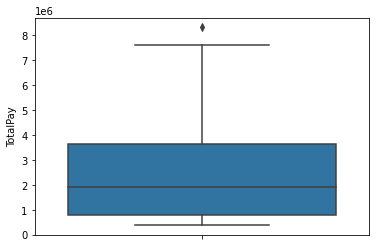

In [7]:
azCoaches.TotalPay = azCoaches.TotalPay.astype(int)
sns.boxplot(y = azCoaches.TotalPay)
azCoaches.describe()

# Bringing in Wins and Losses and Adding to Dataframe

In [8]:
# Fetch a single <1MB file using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/bchap90210/bchap90210/Data-Files/sportsref_football%20win%20loss.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9635  100  9635    0     0  65993      0 --:--:-- --:--:-- --:--:-- 65993


In [9]:
winLoss = pd.read_csv("sportsref_football%20win%20loss.csv", header = 1)
winLoss = winLoss.drop(['Notes', 'AP Rank', 'AP High', 'AP Pre', 'SOS', 'SRS', 'Def', 'Off', 'Pct.1', 'L.1', 'W.1', 'Pct', 'Conf', 'Rk'], axis=1)
winLoss = winLoss.sort_values(by = 'School')
winLoss = winLoss.replace(to_replace = "Bowling Green State", value = "Bowling Green")
#winLoss = winLoss.replace(to_replace = "UAB", value = "Alabama at Birmingham")
winLoss = winLoss.replace(to_replace = "UCF", value = "Central Florida")
winLoss = winLoss.replace(to_replace = "USC", value = "Southern California")
winLoss = winLoss.replace(to_replace = "SMU", value = "Southern Methodist")
winLoss = winLoss.replace(to_replace = "UTEP", value = "Texas-El Paso")
winLoss = winLoss.replace(to_replace = "UTSA", value = "Texas-San Antonio")
winLoss = winLoss.replace(to_replace = "Pitt", value = "Pittsburgh")
winLoss = winLoss.replace(to_replace = "Middle Tennessee State", value = "Middle Tennessee")
winLoss = winLoss.replace(to_replace = "[(]OH[)]", value = "(Ohio)", regex=True)
winLoss = winLoss.replace(to_replace = "[(]FL[)]", value = "(Fla.)", regex=True)
winLoss = winLoss.replace(to_replace = "Louisiana", value = "Louisiana-Lafayette")
winLoss = winLoss.replace(to_replace = "Ole Miss", value = "Mississippi")

winLoss = winLoss[winLoss.School != 'Temple']
 
# Delete these row indexes from dataFrame
#joinDF = joinDF.drop(indexNames, inplace=True)
winLoss = winLoss.sort_values(by = 'School')

HTML(winLoss.to_html())

,School,W,L
83,Air Force,11,2
75,Akron,0,12
114,Alabama,11,2
120,Appalachian State,13,1
105,Arizona,4,8
102,Arizona State,8,5
119,Arkansas,2,10
126,Arkansas State,8,5
68,Army,5,8
115,Auburn,9,4


In [10]:
# joining data using School as key
joinDF = azCoaches.merge(winLoss, on='School', how='left',)

# had a good join but some schools with different names, so going to use regex to clean it up
#winLoss = winLoss.drop(['Temple'])
#indexNames = joinDF[joinDF['School'] == 'Temple' ].index
 
# Delete these row indexes from dataFrame
#joinDF.drop(indexNames, inplace=True)
# pd.DataFrame.set_index(joinDF)
HTML(joinDF.to_html())

,School,Conference,Coach,TotalPay,W,L
0,Air Force,Mt. West,Troy Calhoun,885000,11,2
1,Akron,MAC,Terry Bowden,412500,0,12
2,Alabama,SEC,Nick Saban,8307000,11,2
3,Appalachian State,Sun Belt,Scott Satterfield,712500,13,1
4,Arizona,Pac-12,Kevin Sumlin,2000000,4,8
5,Arizona State,Pac-12,Herm Edwards,2000000,8,5
6,Arkansas,SEC,Chad Morris,3500000,2,10
7,Arkansas State,Sun Belt,Blake Anderson,825000,8,5
8,Army,Ind.,Jeff Monken,932521,5,8
9,Auburn,SEC,Gus Malzahn,6705656,9,4


# Graduation Rates

In [11]:
# Fetch a single <1MB file using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/bchap90210/bchap90210/Data-Files/Football%20Graduation%20Rates.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7106  100  7106    0     0  47373      0 --:--:-- --:--:-- --:--:-- 47373


In [12]:
gr = pd.read_csv("Football%20Graduation%20Rates.csv", header = 0)
print(gr)

     Cohort Year             School  ... State GSR
0           2012              Akron  ...    OH  75
1           2012            Alabama  ...    AL  85
2           2012  Appalachian State  ...    NC  75
3           2012      Arizona State  ...    AZ  75
4           2012            Arizona  ...    AZ  76
..           ...                ...  ...   ...  ..
126         2012   Western Michigan  ...    MI  80
127         2012          Wisconsin  ...    WI  90
128         2012            Wyoming  ...    WY  85
129         2012                UAB  ...    AL  71
130         2012             Toledo  ...    OH  83

[131 rows x 6 columns]


In [13]:
grReplace = gr.drop(['Cohort Year', 'State', 'Conference', 'Sport'], axis=1)
grReplace = grReplace.sort_values(by='School')
print(grReplace)

                School  GSR
114          Air Force   80
0                Akron   75
1              Alabama   85
2    Appalachian State   75
4              Arizona   76
..                 ...  ...
124      West Virginia   66
125   Western Kentucky   71
126   Western Michigan   80
127          Wisconsin   90
128            Wyoming   85

[131 rows x 2 columns]


In [14]:
totalDF = joinDF.merge(grReplace, on='School', how='left',)
HTML(totalDF.to_html())

,School,Conference,Coach,TotalPay,W,L,GSR
0,Air Force,Mt. West,Troy Calhoun,885000,11,2,80
1,Akron,MAC,Terry Bowden,412500,0,12,75
2,Alabama,SEC,Nick Saban,8307000,11,2,85
3,Appalachian State,Sun Belt,Scott Satterfield,712500,13,1,75
4,Arizona,Pac-12,Kevin Sumlin,2000000,4,8,76
5,Arizona State,Pac-12,Herm Edwards,2000000,8,5,75
6,Arkansas,SEC,Chad Morris,3500000,2,10,67
7,Arkansas State,Sun Belt,Blake Anderson,825000,8,5,80
8,Army,Ind.,Jeff Monken,932521,5,8,87
9,Auburn,SEC,Gus Malzahn,6705656,9,4,76


In [15]:
#Dataset = totalDF.drop(['SchoolPay', 'Bonus', 'BonusPaid', 'AssistantPay', 'Buyout', 'W', 'L'], axis=1)
#Dataset.TotalPay = Dataset.TotalPay.str.replace('$', '')
#Dataset.TotalPay = Dataset.TotalPay.str.replace(',', '')
#Dataset.TotalPay = Dataset.TotalPay.str.replace(' ', '')
Dataset = totalDF
print(Dataset)

                School Conference              Coach  TotalPay   W   L  GSR
0            Air Force   Mt. West       Troy Calhoun    885000  11   2   80
1                Akron        MAC       Terry Bowden    412500   0  12   75
2              Alabama        SEC         Nick Saban   8307000  11   2   85
3    Appalachian State   Sun Belt  Scott Satterfield    712500  13   1   75
4              Arizona     Pac-12       Kevin Sumlin   2000000   4   8   76
..                 ...        ...                ...       ...  ..  ..  ...
124      West Virginia     Big 12     Dana Holgorsen   3617500   5   7   66
125   Western Kentucky      C-USA   Mike Sanford Jr.    805850   9   4   71
126   Western Michigan        MAC         Tim Lester    800000   7   6   80
127          Wisconsin    Big Ten        Paul Chryst   3750000  10   4   90
128            Wyoming   Mt. West         Craig Bohl   1412000   8   5   85

[129 rows x 7 columns]


In [16]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 128
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   School      129 non-null    object
 1   Conference  129 non-null    object
 2   Coach       129 non-null    object
 3   TotalPay    129 non-null    int64 
 4   W           129 non-null    int64 
 5   L           129 non-null    int64 
 6   GSR         129 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 8.1+ KB


# Adding Amount of NFL Players for Each Team

In [17]:
# Fetch a single <1MB file using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/bchap90210/bchap90210/Data-Files/NFLPlayers.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1979  100  1979    0     0  12605      0 --:--:-- --:--:-- --:--:-- 12605


In [18]:
nfl = pd.read_csv("NFLPlayers.csv", header = 0)
print(nfl)

                  School  NFLPlayers
0                Alabama          56
1             Ohio State          45
2                Florida          35
3           Miami (Fla.)          34
4                    LSU          32
..                   ...         ...
125  Louisiana-Lafayette           1
126        South Alabama           1
127     Louisiana-Monroe           0
128     Nevada-Las Vegas           0
129    Texas-San Antonio           0

[130 rows x 2 columns]


In [19]:
addNFL = Dataset.merge(nfl, on='School', how='left',)
HTML(addNFL.to_html())

,School,Conference,Coach,TotalPay,W,L,GSR,NFLPlayers
0,Air Force,Mt. West,Troy Calhoun,885000,11,2,80,2
1,Akron,MAC,Terry Bowden,412500,0,12,75,4
2,Alabama,SEC,Nick Saban,8307000,11,2,85,56
3,Appalachian State,Sun Belt,Scott Satterfield,712500,13,1,75,4
4,Arizona,Pac-12,Kevin Sumlin,2000000,4,8,76,5
5,Arizona State,Pac-12,Herm Edwards,2000000,8,5,75,10
6,Arkansas,SEC,Chad Morris,3500000,2,10,67,12
7,Arkansas State,Sun Belt,Blake Anderson,825000,8,5,80,2
8,Army,Ind.,Jeff Monken,932521,5,8,87,2
9,Auburn,SEC,Gus Malzahn,6705656,9,4,76,26


# Running First Model Total Pay ~ W + L + GSR + NFLPlayers

In [0]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Creating a regression model for salary

np.random.seed(1234)
addNFL['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(addNFL))
addNFL_train = addNFL[addNFL['runiform'] >= 0.33]
addNFL_test = addNFL[addNFL['runiform'] < 0.33]

#y = Dataset.TotalPay
#x = Dataset.Wins
#x = sm.add_constant(x)
#results = sm.OLS(y, x.astype(float)).fit()


results = smf.ols('TotalPay ~ W + L + GSR + NFLPlayers + Conference', data=addNFL_train).fit()
#print(results.summary())

In [47]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     33.35
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           6.38e-27
Time:                        12:31:25   Log-Likelihood:                -1373.3
No. Observations:                  92   AIC:                             2777.
Df Residuals:                      77   BIC:                             2814.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3.99

# Adding Stadium Capacity

In [22]:
# Fetch a single <1MB file using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/bchap90210/bchap90210/Data-Files/StadiumSizes.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2443  100  2443    0     0  17832      0 --:--:-- --:--:-- --:--:-- 17832


In [23]:
stadiums = pd.read_csv("StadiumSizes.csv", header = 0)
print(stadiums)

                   School  Capacity
0        New Mexico State     30343
1       Texas-San Antonio     65000
2              Washington     70500
3             Boise State     36387
4        Georgia Southern     25000
..                    ...       ...
125                  Troy     30402
126      Western Michigan     30200
127         Massachusetts     17000
128  North Carolina State     57583
129        South Carolina     80250

[130 rows x 2 columns]


In [24]:
addStadiums = addNFL.merge(stadiums, on='School', how='left',)
HTML(addStadiums.to_html())

,School,Conference,Coach,TotalPay,W,L,GSR,NFLPlayers,runiform,Capacity
0,Air Force,Mt. West,Troy Calhoun,885000,11,2,80,2,0.191519,46692
1,Akron,MAC,Terry Bowden,412500,0,12,75,4,0.622109,30000
2,Alabama,SEC,Nick Saban,8307000,11,2,85,56,0.437728,101821
3,Appalachian State,Sun Belt,Scott Satterfield,712500,13,1,75,4,0.785359,30000
4,Arizona,Pac-12,Kevin Sumlin,2000000,4,8,76,5,0.779976,56029
5,Arizona State,Pac-12,Herm Edwards,2000000,8,5,75,10,0.272593,56232
6,Arkansas,SEC,Chad Morris,3500000,2,10,67,12,0.276464,80000
7,Arkansas State,Sun Belt,Blake Anderson,825000,8,5,80,2,0.801872,30964
8,Army,Ind.,Jeff Monken,932521,5,8,87,2,0.958139,38000
9,Auburn,SEC,Gus Malzahn,6705656,9,4,76,26,0.875933,87451


# Running 2nd Model Total Pay ~ Wins + Losses + GSR + NFL Players + Capacity

In [0]:
np.random.seed(1234)
addStadiums['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(addStadiums))
addStadiums_train = addStadiums[addStadiums['runiform'] >= 0.33]
addStadiums_test = addStadiums[addStadiums['runiform'] < 0.33]

#y = Dataset.TotalPay
#x = Dataset.Wins
#x = sm.add_constant(x)
#results = sm.OLS(y, x.astype(float)).fit()


results2 = smf.ols('TotalPay ~ NFLPlayers + Capacity + W + L + GSR + Conference', data=addStadiums_train).fit()

In [49]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     32.83
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           4.57e-27
Time:                        12:33:03   Log-Likelihood:                -1370.6
No. Observations:                  92   AIC:                             2773.
Df Residuals:                      76   BIC:                             2814.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3.12

In [68]:
# training set predictions from the model fit to the training set
addStadiums_train['predict_salary'] = results2.fittedvalues

# test set predictions from the model fit to the training set
addStadiums_test['predict_salary'] = results2.predict(addStadiums_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [70]:
addStadiums_train[addStadiums['School']=='Syracuse']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,School,Conference,Coach,TotalPay,W,L,GSR,NFLPlayers,Capacity,runiform,predict_salary
101,Syracuse,ACC,Dino Babers,2401206,5,7,85,4,49250,0.708115,2.395358e+06


## Re-running Without Variables That are not Statistically Significant

In [0]:
# only leaving in statistically significant variables and re-running
train_model_fit = smf.ols('TotalPay ~ Capacity + NFLPlayers + Conference', data=addStadiums_train).fit()

In [59]:
print(train_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     40.82
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           7.58e-29
Time:                        15:20:58   Log-Likelihood:                -1372.4
No. Observations:                  92   AIC:                             2771.
Df Residuals:                      79   BIC:                             2804.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2.52

## Re-running the Model With Only Capacity and NFL Players

In [0]:
# Using only capacity and NFL Players
train_model_fit2 = smf.ols('TotalPay ~ Capacity + NFLPlayers + Conference', data=addStadiums_train).fit()

In [53]:
print(train_model_fit2.summary())

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     40.82
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           7.58e-29
Time:                        12:34:03   Log-Likelihood:                -1372.4
No. Observations:                  92   AIC:                             2771.
Df Residuals:                      79   BIC:                             2804.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2.52

In [54]:
# training set predictions from the model fit to the training set
addStadiums_train['predict_salary'] = train_model_fit2.fittedvalues

# test set predictions from the model fit to the training set
addStadiums_test['predict_salary'] = train_model_fit2.predict(addStadiums_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [34]:
HTML(addStadiums_train.to_html())

,School,Conference,Coach,TotalPay,W,L,GSR,NFLPlayers,runiform,Capacity,predict_salary
1,Akron,MAC,Terry Bowden,412500,0,12,75,4,0.622109,30000,1.032561e+06
2,Alabama,SEC,Nick Saban,8307000,11,2,85,56,0.437728,101821,8.405049e+06
3,Appalachian State,Sun Belt,Scott Satterfield,712500,13,1,75,4,0.785359,30000,1.032561e+06
4,Arizona,Pac-12,Kevin Sumlin,2000000,4,8,76,5,0.779976,56029,1.985443e+06
7,Arkansas State,Sun Belt,Blake Anderson,825000,8,5,80,2,0.801872,30964,8.716290e+05
8,Army,Ind.,Jeff Monken,932521,5,8,87,2,0.958139,38000,1.103168e+06
9,Auburn,SEC,Gus Malzahn,6705656,9,4,76,26,0.875933,87451,5.042344e+06
10,Ball State,MAC,Mike Neu,435689,5,7,73,1,0.357817,22500,4.967707e+05
11,Baylor,Big 12,Matt Rhule,4250000,11,3,90,7,0.500995,45140,1.819766e+06
12,Boise State,Mt. West,Bryan Harsin,1650010,12,2,87,9,0.683463,36387,1.724379e+06


In [61]:
# Using only capacity and NFL Players
train_model_fit3 = smf.ols('TotalPay ~ Capacity + NFLPlayers', data=addStadiums_train).fit()
print(train_model_fit3.summary())

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     162.2
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           2.08e-30
Time:                        15:45:43   Log-Likelihood:                -1392.6
No. Observations:                  92   AIC:                             2791.
Df Residuals:                      89   BIC:                             2799.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -3.4e+05   2.53e+05     -1.346      0.1

# Subsetting Model and Using Conference

In [0]:
# Get rid of runiform category to split out by conference
addStadiums = addStadiums.drop(['runiform'], axis='columns')

In [37]:
# Showing all conferences in the dataset
addStadiums.groupby('Conference').count()

,School,Coach,TotalPay,W,L,GSR,NFLPlayers,Capacity
Conference,,,,,,,,
AAC,11,11,11,11,11,11,11,11
ACC,14,14,14,14,14,14,14,14
Big 12,10,10,10,10,10,10,10,10
Big Ten,14,14,14,14,14,14,14,14
C-USA,14,14,14,14,14,14,14,14
Ind.,6,6,6,6,6,6,6,6
MAC,12,12,12,12,12,12,12,12
Mt. West,12,12,12,12,12,12,12,12
Pac-12,12,12,12,12,12,12,12,12


In [0]:
# Creating a dataframe for each conference
groups = addStadiums.groupby('Conference')
AAC = groups.get_group('AAC')
ACC = groups.get_group('ACC')
Big12 = groups.get_group('Big 12')
Big10 = groups.get_group('Big Ten')
CUSA = groups.get_group('C-USA')
Indep = groups.get_group('Ind.')
MAC = groups.get_group('MAC')
MW = groups.get_group('Mt. West')
Pac12 = groups.get_group('Pac-12')
SEC = groups.get_group('SEC')
SunBelt = groups.get_group('Sun Belt')

In [39]:
# Checking Syracuse' Conference
print(ACC)

                   School Conference  ... NFLPlayers  Capacity
13         Boston College        ACC  ...         13     44500
22                Clemson        ACC  ...         27     81500
27                   Duke        ACC  ...          9     40000
33          Florida State        ACC  ...         32     79560
38           Georgia Tech        ACC  ...          6     55000
54             Louisville        ACC  ...         15     61000
59           Miami (Fla.)        ACC  ...         34     65326
74         North Carolina        ACC  ...         15     51000
75   North Carolina State        ACC  ...         14     57583
88             Pittsburgh        ACC  ...         14     68400
101              Syracuse        ACC  ...          4     49250
119              Virginia        ACC  ...         13     61500
120         Virginia Tech        ACC  ...         14     66233
121           Wake Forest        ACC  ...          5     31500

[14 rows x 9 columns]


In [40]:
np.random.seed(1234)
ACC['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(ACC))
ACC_train = ACC[ACC['runiform'] >= 0.33]
ACC_test = ACC[ACC['runiform'] < 0.33]

#y = Dataset.TotalPay
#x = Dataset.Wins
#x = sm.add_constant(x)
#results = sm.OLS(y, x.astype(float)).fit()


train_model_fit3 = smf.ols('TotalPay ~ Capacity + NFLPlayers + GSR', data=ACC_train).fit()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [95]:
print(train_model_fit3.summary())

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     162.2
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           2.08e-30
Time:                        17:19:55   Log-Likelihood:                -1392.6
No. Observations:                  92   AIC:                             2791.
Df Residuals:                      89   BIC:                             2799.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -3.4e+05   2.53e+05     -1.346      0.1

FileNotFoundError: ignored

In [42]:
# training set predictions from the model fit to the training set
ACC_train['predict_salary'] = train_model_fit3.fittedvalues

# test set predictions from the model fit to the training set
ACC_test['predict_salary'] = train_model_fit3.predict(addStadiums_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [43]:
#print(ACC_train)
#print(ACC_test)

HTML(ACC_train.to_html())

,School,Conference,Coach,TotalPay,W,L,GSR,NFLPlayers,Capacity,runiform,predict_salary
22,Clemson,ACC,Dabo Swinney,6543350,14,1,81,27,81500,0.622109,5.915080e+06
27,Duke,ACC,David Cutcliffe,2540928,5,7,96,9,40000,0.437728,2.974850e+06
33,Florida State,ACC,Willie Taggart,5000000,6,7,60,32,79560,0.785359,5.169346e+06
38,Georgia Tech,ACC,Paul Johnson,3060018,3,9,87,6,55000,0.779976,2.739072e+06
74,North Carolina,ACC,Larry Fedora,2575000,7,6,70,15,51000,0.801872,2.598995e+06
75,North Carolina State,ACC,Dave Doeren,3000000,4,8,71,14,57583,0.958139,2.822989e+06
88,Pittsburgh,ACC,Pat Narduzzi,3017718,8,5,78,14,68400,0.875933,3.694295e+06
101,Syracuse,ACC,Dino Babers,2401206,5,7,85,4,49250,0.357817,2.148269e+06
119,Virginia,ACC,Bronco Mendenhall,3550000,9,5,86,13,61500,0.500995,3.757473e+06
120,Virginia Tech,ACC,Justin Fuente,4000000,8,5,87,14,66233,0.683463,4.131791e+06


In [44]:
ACC.TotalPay.mean

<bound method Series.mean of 13     2514859
22     6543350
27     2540928
33     5000000
38     3060018
54     3980434
59     4058061
74     2575000
75     3000000
88     3017718
101    2401206
119    3550000
120    4000000
121    1831580
Name: TotalPay, dtype: int64>

In [45]:
Big10.TotalPay.mean

<bound method Series.mean of 41     5000000
42     1830000
43     4700000
56     2512000
61     7504000
62     4390417
64     3550000
69     5000000
78     3619775
81     7600000
87     4800000
89     3800000
91     2200000
127    3750000
Name: TotalPay, dtype: int64>

In [0]:
joinedSet = pd.concat([addStadiums_test, addStadiums_train])

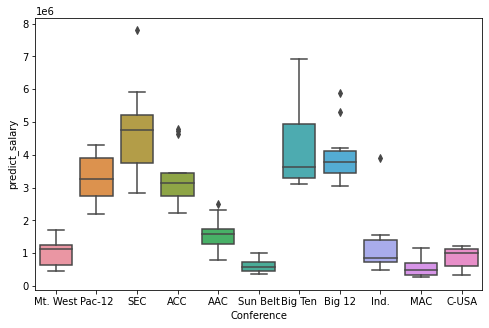

In [83]:
from google.colab import files
plt.figure(figsize=(8,5))
sns.boxplot(y=joinedSet.predict_salary, x=joinedSet.Conference)
plt.savefig('conferences.png')
files.download('conferences.png')